### Georgetown CCPE Data Science Program
### Team CDWT
### Created:  May 2016
### Copyright (C) 2016
### For license information, see LICENSE.txt

# We would like to answer is to determine if african american victims are more likely to be killed, given the officer race, officer age, and officer gender. 

In [1]:
import pandas as pd
import numpy as np
aulvindy = pd.read_csv('READ_IN_YOUR.csv')

In [2]:
aulvindy.tail(1)

,UniqueID,victim_race,victim_gender,victim_age,officer_race,officer_gender,officer_age,Police_Department
142,143,Hispanic,Male,31,Hispanic,Male,32,Austin Police Department


## Dataset summary visualization

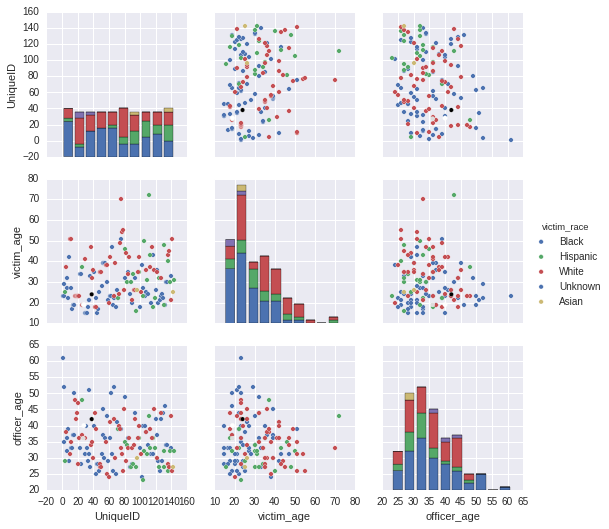

In [3]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.pairplot(aulvindy, hue="victim_race")

### Drop unused columns

In [4]:
aulvindy.drop(["UniqueID","victim_gender","victim_age","Police_Department"],
                        axis=1,inplace=True)
aulvindy.tail(1)

,victim_race,officer_race,officer_gender,officer_age
142,Hispanic,Hispanic,Male,32


In [5]:
# Check for missing values for age
X = aulvindy["officer_age"].reshape(-1, 1)
# Assign the mean value
from sklearn.preprocessing import Imputer
dataimp = Imputer(missing_values='NaN', strategy='mean',verbose=1,axis=0).fit_transform(X)

In [6]:
aulvindy.officer_age = dataimp

In [7]:
aulvindy.tail(1)

,victim_race,officer_race,officer_gender,officer_age
142,Hispanic,Hispanic,Male,32


In [8]:
# Encode victim_race as 1 for african american or 0 for other races
def victim_race_encode(x):
    if x=='Black':
        return 1
    else: 
        return 0
aulvindy['victim_race'] = aulvindy['victim_race'].apply(victim_race_encode)

In [9]:
aulvindy.tail(1)

,victim_race,officer_race,officer_gender,officer_age
142,0,Hispanic,Male,32


In [10]:
# Encode officer_gender as 1 for male or 0 for female
def officer_gender_encode(x):
    if x=='Male':
        return 1
    else: 
        return 0
aulvindy['officer_gender'] = aulvindy['officer_gender'].apply(officer_gender_encode)

In [11]:
aulvindy.tail(1)

,victim_race,officer_race,officer_gender,officer_age
142,0,Hispanic,1,32


In [12]:
X = aulvindy.officer_race.reshape(-1, 1)

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
X = aulvindy.officer_race.reshape(-1, 1)
enc = LabelEncoder()
label_encoder = enc.fit(X)

/home/dwaynej/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
label_encoder.classes_

array(['Asian', 'Black', 'Hispanic', 'White'], dtype=object)

In [15]:
integer_classes = label_encoder.transform(label_encoder.classes_).reshape(4,1)

In [16]:
enc = OneHotEncoder()
one_hot_encoder = enc.fit(integer_classes)
                          
# First, convert classes to 0-(N-1) integers using labelencoder
num_of_rows = len(aulvindy.index)

t = label_encoder.transform(X).reshape(num_of_rows, 1)

# Second, create a sparse matrix with three columns, each one indicating if the instance belongs to the class
new_features = one_hot_encoder.transform(t)

# Add the new features to titanix_X
X = np.concatenate([X, new_features.toarray()], axis = 1)


In [17]:
#Eliminate converted columns
X = np.delete(X, [0], 1)

In [18]:
# Update officer race names
feature_names = ['OfficerRaceAsian', 'OfficerRaceBlack', 'OfficerRaceHispanic', 'OfficerRaceWhite']
#convert X back to dataframe
X_df = pd.DataFrame(X)
        

In [19]:
X_df.columns = feature_names

In [20]:
X_df.head()

,OfficerRaceAsian,OfficerRaceBlack,OfficerRaceHispanic,OfficerRaceWhite
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [21]:
aulvindy.head(1)

,victim_race,officer_race,officer_gender,officer_age
0,1,White,1,61


In [22]:
y = aulvindy.victim_race

In [23]:
aulvindy.drop(["victim_race","officer_race"],axis=1,inplace=True)

In [24]:
X = pd.concat([X_df, aulvindy], axis=1)

In [25]:
X = X.astype('float64', raise_on_error = False)

In [26]:
y = y.astype(float)


In [27]:
#from sklearn.preprocessing import StandardScaler
#scalar = StandardScaler()
#X = scalar.fit_transform(X)

In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

## Decision  Tree

In [29]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_depth=3,min_samples_leaf=5)
clf = clf.fit(X_train,y_train)

# We would like to answer is to determine if african american victims are more likely to be killed, given the officer race, officer age, and officer gender.

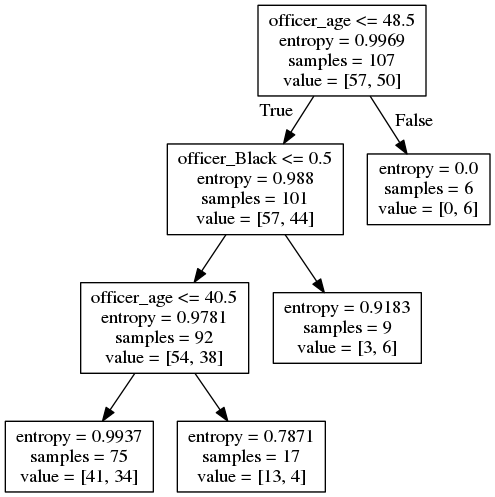

In [30]:
import pydot,StringIO
dot_data = StringIO.StringIO() 
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=['officer_Asian','officer_Black','officer_Hispanic','officer_White','officer_gender','officer_age']) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('/home/dwaynej/Dropbox/Georgetown Data Science/Capstone/Data/decisiontreepd.png') 
from IPython.core.display import Image 
Image(filename='/home/dwaynej/Dropbox/Georgetown Data Science/Capstone/Data/decisiontreepd.png')



In [31]:
y_pred = clf.predict(X_test)

In [32]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')


(0.75, 0.1875, 0.29999999999999999, None)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
#Train Model
lrmodel.fit(X_train,y_train)
y_lrpred = lrmodel.predict(X_test)
precision_recall_fscore_support(y_test, y_lrpred, average='binary')

(0.75, 0.1875, 0.29999999999999999, None)

## SVC

In [34]:
from sklearn.svm import SVC
svcmodel = SVC()
svcmodel.fit(X_train, y_train)
y_svcpred = svcmodel.predict(X_test)
precision_recall_fscore_support(y_test, y_svcpred, average='binary')

(0.5, 0.0625, 0.1111111111111111, None)